In [5]:
import time
import numpy as np
import time
import matplotlib.pyplot as plt 
from os import listdir
import os 
import scipy.sparse.linalg
from matplotlib import rc
from matplotlib import rcParams

params = {'legend.fontsize': 15, "axes.labelsize": 20}
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('text', usetex=True)
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)
rcParams.update(params)
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color'][:20]


def extract_data(hess_dir, filename):
    list_of_features = filename.split('_')
    
    sol_space = list_of_features[0]
    
    if sol_space == 'REAL': 
        seedhess = int(list_of_features[-1].split('.')[0])
        
        eigs = np.loadtxt(hess_dir+'/'+filename, unpack = True)
        N_samples = eigs.shape[0]
        
        features = {
            'sol_space': sol_space,
            'seed_hess': seedhess,
            'N_samples': N_samples,
            'eigs': eigs
        }
    
    else:
        Nc = int(list_of_features[2])
        seedhess = int(list_of_features[-1].split('.')[0])
        
        eigs = np.loadtxt(hess_dir+'/'+filename, unpack = True)
        N_samples = eigs.shape[0]
        if sol_space == 'RANDFOURIER':
            n_iter = int(eigs.shape[-1]/(2*Nc))
            eigs = eigs.reshape(N_samples, n_iter, 2*Nc)
            
        features = {
            'sol_space': sol_space,
            'seed_hess': seedhess,
            'N_samples': N_samples,
            'Nc' : Nc,
            'eigs': eigs
        }        
                
    return features


def organize_data_sols_space(file_data):
    spaces = ['REAL', 'FOURIER', 'RANDFOURIER']
    
    grouped_data = {}
    eigenvalues = {}

    for s in spaces:
        indxs = [index for index, value in enumerate(file_data) if value['sol_space'] == s]
        grouped_data[s] = file_data[indxs] 
        eigenvalues[s] = list(map(lambda d: d['eigs'], grouped_data[s]))

    return grouped_data, eigenvalues


def mean_over_N_samples(eigenvalues):
    eig_mean = {}
    for s in eigenvalues.keys():
        eig_mean[s] = list(map(lambda d: np.mean(d, axis=0), eigenvalues[s]))
    return eig_mean




def plot_eigenvalues_mean(eigenvalues_mean, grouped_data, logx = False, ylim = 10):

    fig_eigenvalues = plt.figure()
    ax = fig_eigenvalues.add_axes([.2,.2,.8,.8])
    N_samples = grouped_data['REAL'][0]['N_samples']
                             
    for s in eigenvalues_mean.keys():
        for j,d in enumerate(eigenvalues_mean[s]):    
            if s == 'REAL': label = s
            else:
                Nc = grouped_data[s][j]['Nc']
                label = s+' Nc = {}'.format(Nc)
            ax.plot(np.linspace(0,1,len(d)) , d, '.--', label = label)

    ax.legend(fontsize = 12)
    if logx: ax.set_xscale('log')
    ax.set_ylabel('Eigenvalues')
    ax.set_xlabel('Eigenvalues index')
    ax.set_ylim(0,ylim)
    ax.set_title('N of samples = {}'.format(N_samples))

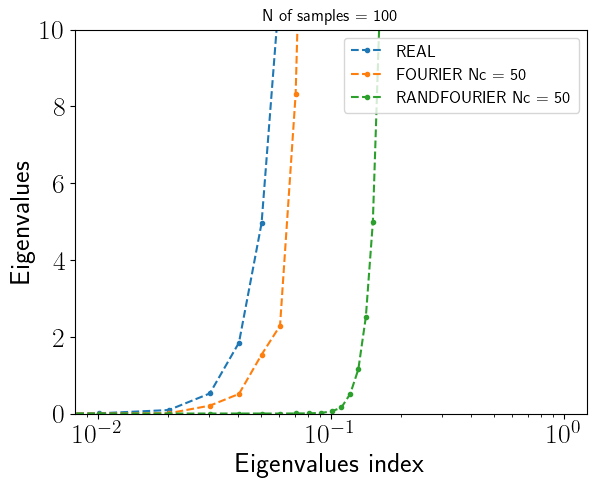

In [6]:
# We collect the data and the corresponding eigenvalues 
# according to the solution space they belong

dim = 100
current_dir =  os. getcwd()
hess_dir = current_dir+'/Random_hessians/dim_{}/'.format(dim)


file_data = []
for f in os.listdir(hess_dir):
    fd = extract_data(hess_dir, f)
    file_data.append(fd)
file_data = np.array(file_data)

grouped_data, eigenvalues = organize_data_sols_space(file_data)
eigenvalues_mean = mean_over_N_samples(eigenvalues)




for j,d in enumerate(eigenvalues_mean['RANDFOURIER']):
    eigenvalues_mean['RANDFOURIER'][j] = np.mean(d, axis = 0)
    
    
plot_eigenvalues_mean(eigenvalues_mean, grouped_data, ylim = 10, logx=True)

$E_k = \alpha k^\beta + q $

$H_{mn} = \sum_k U^\dagger_{mk} E_k U_{kn}$